
# K-Means Clustering: First Principles Approach

In this notebook, we will learn **K-Means Clustering** from scratch — both intuitively and mathematically — before applying it in code.

We begin with an exercise you must solve **by hand** using pen and paper, followed by a walk-through of each step in code.

---

## Objectives:
- Understand K-Means as an optimization algorithm minimizing intra-cluster variance (SSE).
- Manually perform one iteration of K-Means on a toy dataset.
- Write code that replicates the manual process.


---
#  Manual Exercise

Given the following 2D data points and an initial guess of cluster centers, perform **one iteration** of K-Means by hand:

### Data Points:
- A = (1, 1)
- B = (1.5, 2)
- C = (3, 4)
- D = (5, 7)
- E = (3.5, 5)
- F = (4.5, 5)
- G = (3.5, 4.5)

### Initial Centroids:
- Centroid 1: (1, 1)
- Centroid 2: (5, 7)

### Tasks:
1. Assign each point to the nearest centroid using Euclidean distance.
2. Recompute the centroids for the new clusters.

 *Perform all calculations manually and write down your cluster assignments and updated centroids.*
---

---

---

---

---

---

#  K-Means Clustering (Manual Calculation): First Iteration

---

###  Step 1: Compute Distances and Assign Points

We use the **Euclidean distance**:

$$
d(\mathbf{x},\ \mathbf{c}) = \sqrt{(x_1 - c_1)^2 + (x_2 - c_2)^2}
$$

| Point | Coordinates | $d(x,\ C_1)$ | $d(x,\ C_2)$ | Assigned Cluster |
|-------|-------------|--------------|--------------|------------------|
| A     | (1.0, 1.0)  | $0.00$       | $\sqrt{52} \approx 7.21$ | 1 |
| B     | (1.5, 2.0)  | $\sqrt{1.25} \approx 1.12$ | $\sqrt{36.25} \approx 6.02$ | 1 |
| C     | (3.0, 4.0)  | $\sqrt{13} \approx 3.61$ | $\sqrt{13} \approx 3.61$ | 1 (tie) |
| D     | (5.0, 7.0)  | $\sqrt{52} \approx 7.21$ | $0.00$ | 2 |
| E     | (3.5, 5.0)  | $\sqrt{22.25} \approx 4.72$ | $\sqrt{6.25} = 2.50$ | 2 |
| F     | (4.5, 5.0)  | $\sqrt{28.25} \approx 5.31$ | $\sqrt{4.25} \approx 2.06$ | 2 |
| G     | (3.5, 4.5)  | $\sqrt{18.5} \approx 4.30$ | $\sqrt{8.5} \approx 2.92$ | 2 |

---

###  Cluster Assignments

- **Cluster 1**: A, B, C  
- **Cluster 2**: D, E, F, G

---

###  Step 2: Update Centroids

**New centroid for Cluster 1** (A, B, C):

$$
C_1^{\text{new}} = \left( \frac{1 + 1.5 + 3}{3},\ \frac{1 + 2 + 4}{3} \right) = (1.83,\ 2.33)
$$

**New centroid for Cluster 2** (D, E, F, G):

$$
C_2^{\text{new}} = \left( \frac{5 + 3.5 + 4.5 + 3.5}{4},\ \frac{7 + 5 + 5 + 4.5}{4} \right) = (4.125,\ 5.375)
$$

---

###  Final Output After One Iteration

| Cluster | Members | Updated Centroid |
|---------|---------|------------------|
| 1       | A, B, C → (1,1), (1.5,2), (3,4) | $(1.83,\ 2.33)$ |
| 2       | D, E, F, G → (5,7), (3.5,5), (4.5,5), (3.5,4.5) | $(4.125,\ 5.375)$ |

Now you can implement the same logic in code to verify the assignments and updated centroids.


In [ ]:

# Let us now code the same example to verify our hand calculations

import numpy as np
import matplotlib.pyplot as plt

# Define the data points
X = np.array([
    [1, 1],
    [1.5, 2],
    [3, 4],
    [5, 7],
    [3.5, 5],
    [4.5, 5],
    [3.5, 4.5]
])

# Initial centroids
centroids = {
    0: np.array([1.0, 1.0]),
    1: np.array([5.0, 7.0])
}


In [ ]:

# Step 1: Assign each point to the nearest centroid
def euclidean(a, b):
    return np.linalg.norm(a - b)

clusters = {0: [], 1: []}
for idx, point in enumerate(X):
    dists = [euclidean(point, centroids[0]), euclidean(point, centroids[1])]
    cluster_idx = np.argmin(dists)
    clusters[cluster_idx].append(idx)

print("Cluster assignments:")
for k in clusters:
    print(f"Cluster {k}: {[X[i] for i in clusters[k]]}")


In [ ]:
# Step 2: Update the centroids
for k in clusters:
    points = np.array([X[i] for i in clusters[k]])
    centroids[k] = np.mean(points, axis=0)

print("Updated centroids:")
for k in centroids:
    print(f"Centroid {k}: {centroids[k]}")


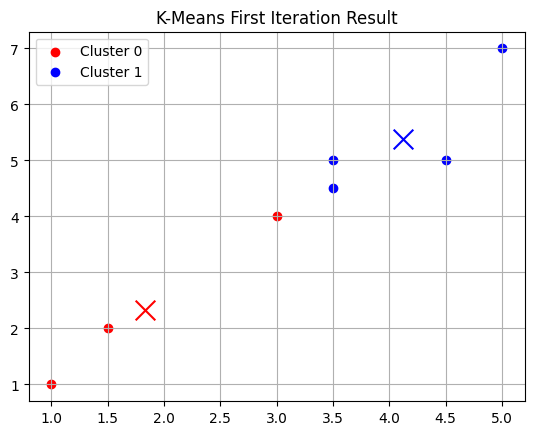

In [ ]:

# Visualize result of the first iteration
colors = ['r', 'b']
for k in clusters:
    points = np.array([X[i] for i in clusters[k]])
    plt.scatter(points[:, 0], points[:, 1], c=colors[k], label=f'Cluster {k}')
    plt.scatter(*centroids[k], c=colors[k], marker='x', s=200)

plt.title("K-Means First Iteration Result")
plt.legend()
plt.grid(True)
plt.show()


---
# Example on synthetic data

---

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # To generate sample data
import numpy as np

# --- 1. Generate Sample Data ---
# Let's create some sample data points that we want to cluster.
# make_blobs is a convenient function to generate isotropic Gaussian blobs
# for clustering.
n_samples = 3000
random_state = 0 # for reproducibility
X, y_true = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.8,
                       random_state=random_state)

print(f"Shape of our data (X): {X.shape}") # Should be (n_samples, n_features)
print(f"First 5 data points:\n{X[:5]}")

Shape of our data (X): (3000, 2)
First 5 data points:
[[ 2.0505256   1.99051171]
 [ 2.05036769  3.71183865]
 [-1.16159004  4.12554383]
 [ 2.72686006  0.75851972]
 [ 2.51202739  1.75550418]]


/tmp/ipython-input-8-1631131355.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


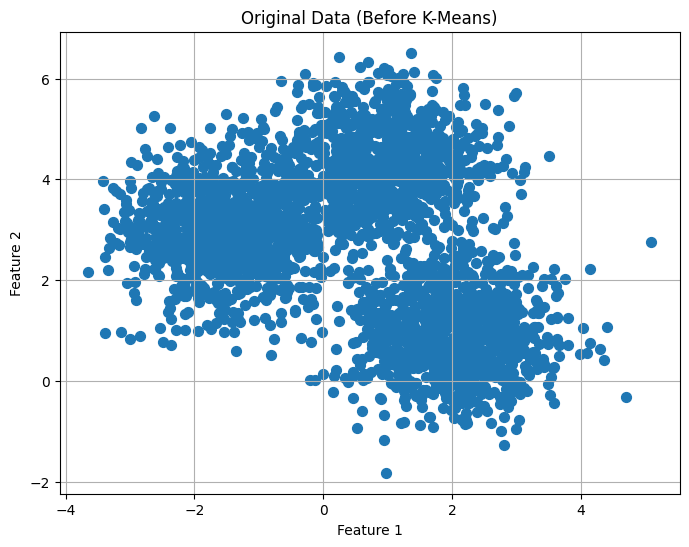

In [ ]:
# Let's visualize our initial data (before clustering)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Original Data (Before K-Means)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [ ]:
# --- 2. Understanding K-Means ---
# K-Means is an algorithm that groups data points into 'K' clusters.
# The goal is to minimize the distance between data points and their
# assigned cluster's centroid (center).

# How it works (simplified):
# 1. Choose K random centroids.
# 2. Assign each data point to the closest centroid.
# 3. Recalculate the centroids based on the mean of the points in each cluster.
# 4. Repeat steps 2 and 3 until the centroids no longer move significantly.

# --- 3. Applying K-Means ---

# Choose the number of clusters (K).
# For our generated data, we know there are 3 natural clusters.
k = 3

# Create a K-Means model.
# n_init='auto' is recommended for robust results as it runs the algorithm
# multiple times with different centroid seeds and picks the best one.
# random_state for reproducibility of the K-Means initialization.
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=random_state)

# Fit the model to our data. This is where the clustering happens!
kmeans.fit(X)

# Get the cluster assignments for each data point.
# labels_ will contain an array where each element is the cluster ID
# (0, 1, or 2 in our case) that the corresponding data point belongs to.
labels = kmeans.labels_

# Get the coordinates of the cluster centroids.
# cluster_centers_ will be an array where each row is the coordinate
# of one of the K centroids.
centroids = kmeans.cluster_centers_

print(f"\nCluster labels for the first 10 data points: {labels[:10]}")
print(f"Coordinates of the {k} cluster centroids:\n{centroids}")
print(f"{kmeans}")


Cluster labels for the first 10 data points: [2 0 1 2 2 0 2 1 1 0]
Coordinates of the 3 cluster centroids:
[[ 0.96405978  4.30911992]
 [-1.54884585  2.92244736]
 [ 1.99775558  0.90773818]]
KMeans(n_clusters=3, random_state=0)


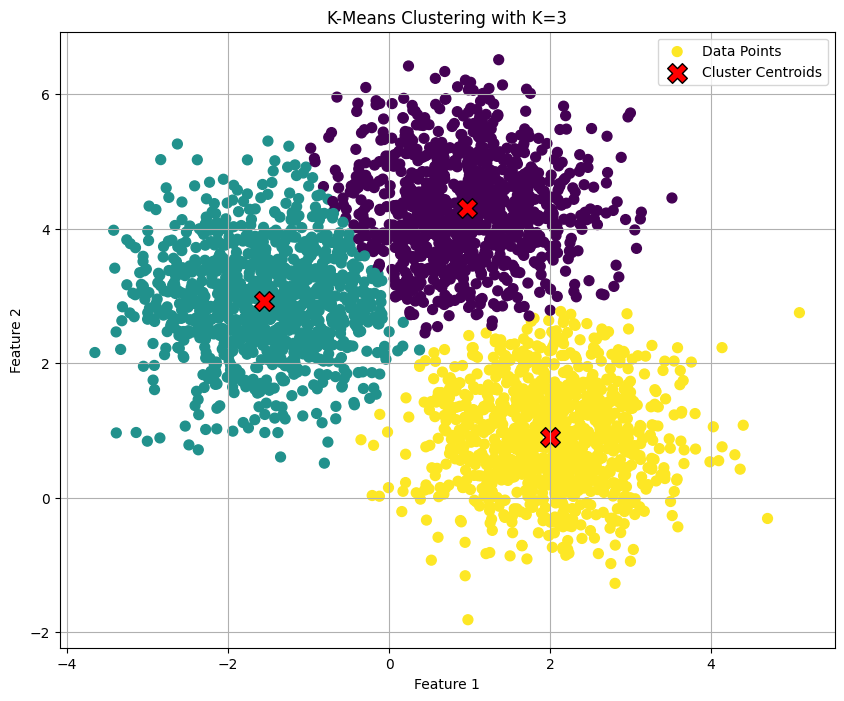

In [ ]:
# --- 4. Visualizing the K-Means Results ---

plt.figure(figsize=(10, 8))

# Plot the data points, colored by their assigned cluster.
# c=labels tells matplotlib to color each point based on its cluster ID.
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')

# Plot the cluster centroids.
# We use a larger marker ('X') for the centroids to make them stand out.
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X',
            edgecolor='black', label='Cluster Centroids')

plt.title(f"K-Means Clustering with K={k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

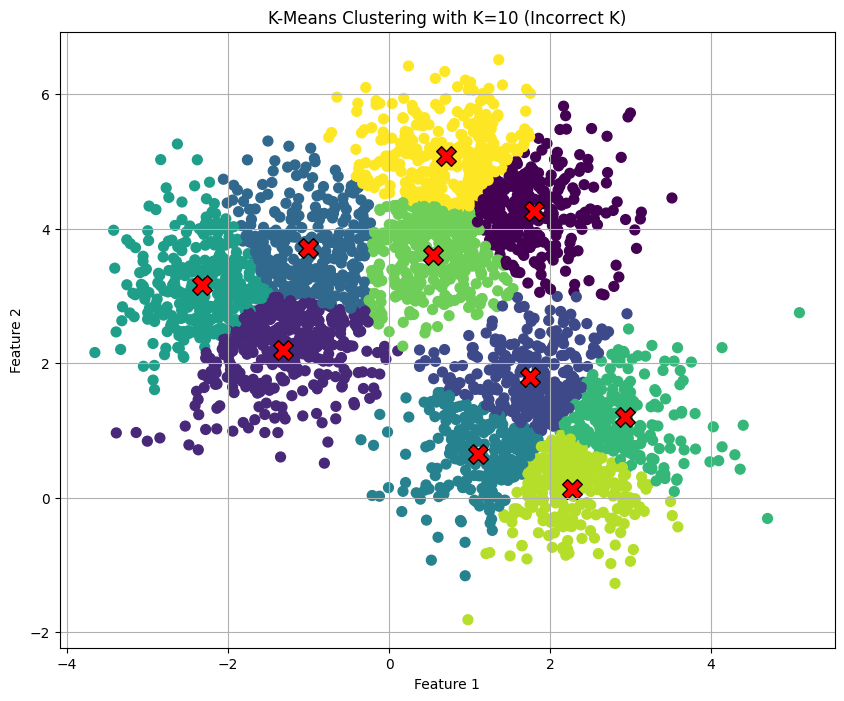


Notice how with K=4, one of the natural clusters is split, or a new 'fake' cluster is created.
Choosing the right K is crucial! Methods like the 'Elbow Method' can help.


In [ ]:
# --- 5. Interpreting the Results ---
# You can see that the K-Means algorithm successfully grouped the data points
# into three distinct clusters, and the red 'X' marks the center of each cluster.

# --- 6. What if K is wrong? (Optional but good to show) ---
# Let's try with a different K (e.g., K=4 or 5) to see the effect.
k_wrong = 10
kmeans_wrong = KMeans(n_clusters=k_wrong, n_init='auto', random_state=random_state)
kmeans_wrong.fit(X)
labels_wrong = kmeans_wrong.labels_
centroids_wrong = kmeans_wrong.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels_wrong, s=50, cmap='viridis')
plt.scatter(centroids_wrong[:, 0], centroids_wrong[:, 1], c='red', s=200, marker='X',
            edgecolor='black')
plt.title(f"K-Means Clustering with K={k_wrong} (Incorrect K)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

print("\nNotice how with K=4, one of the natural clusters is split, or a new 'fake' cluster is created.")
print("Choosing the right K is crucial! Methods like the 'Elbow Method' can help.")

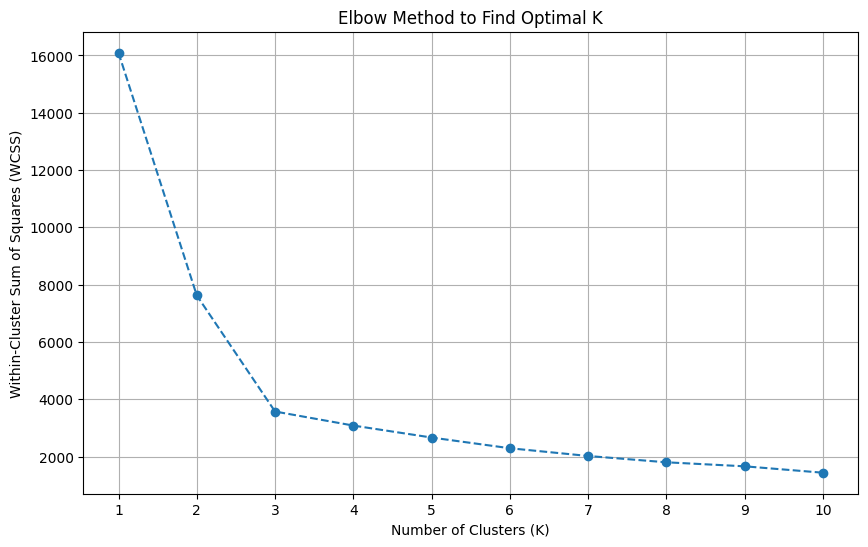


In the Elbow Method plot, look for the 'elbow' point where the WCSS starts to decrease less rapidly.
For our data, the elbow is clearly at K=3, confirming our initial choice.


In [ ]:
# --- 7. Elbow Method (Brief Introduction) ---
# The Elbow Method helps to find the optimal 'K'.
# It involves calculating the Within-Cluster Sum of Squares (WCSS)
# for different values of K and plotting them.
# WCSS is the sum of squared distances between each point and its centroid.

wcss = []
max_k = 10 # Try K from 1 to 10
for i in range(1, max_k + 1):
    kmeans_elbow = KMeans(n_clusters=i, n_init='auto', random_state=random_state)
    kmeans_elbow.fit(X)
    wcss.append(kmeans_elbow.inertia_) # inertia_ is the WCSS

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.xticks(range(1, max_k + 1))
plt.show()

print("\nIn the Elbow Method plot, look for the 'elbow' point where the WCSS starts to decrease less rapidly.")
print("For our data, the elbow is clearly at K=3, confirming our initial choice.")

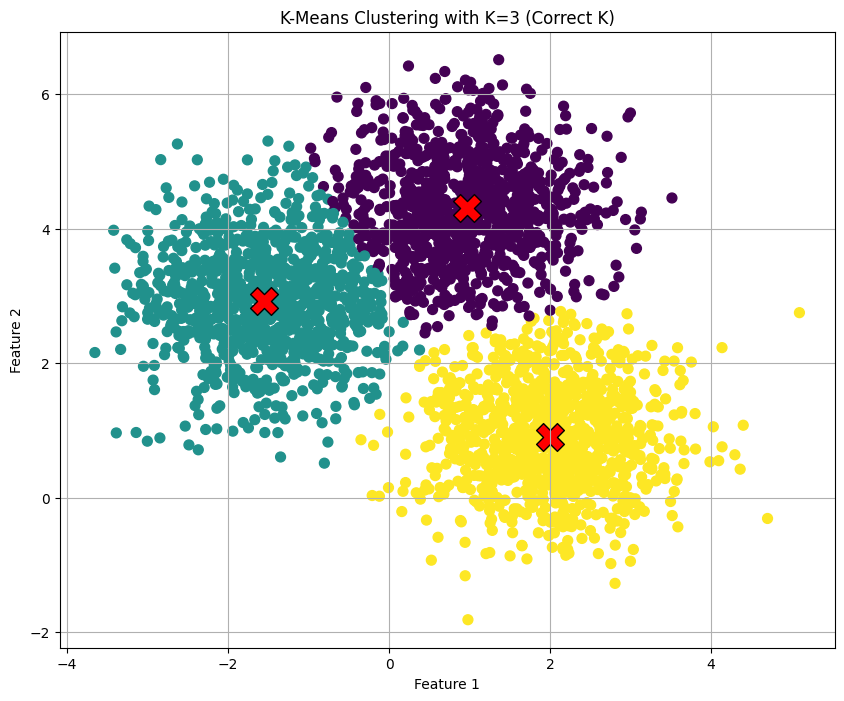


Notice how with K=4, one of the natural clusters is split, or a new 'fake' cluster is created.
Choosing the right K is crucial! Methods like the 'Elbow Method' can help.


In [ ]:
# --- 8. Correct k
# Let's try best k from elbow plot
correct_k =3
kmeans_correct = KMeans(n_clusters=correct_k, n_init='auto', random_state=random_state)
kmeans_correct.fit(X)
labels_correct = kmeans_correct.labels_
centroids_correct = kmeans_correct.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels_correct, s=50, cmap='viridis')

plt.scatter(centroids_correct[:, 0], centroids_correct[:, 1], c='red', s=400, marker='X',
            edgecolor='black')
plt.title(f"K-Means Clustering with K={correct_k} (Correct K)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

print("\nNotice how with K=4, one of the natural clusters is split, or a new 'fake' cluster is created.")
print("Choosing the right K is crucial! Methods like the 'Elbow Method' can help.")

Real world dataset.

In [ ]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/engage_dataset/bmi_train.csv')

ValueError: mount failed

In [ ]:
#  Inspect the dataset
print(df.head())
print(df.info())

#  Handle missing values (drop rows for simplicity)
df = df.dropna()

#  Select features for clustering
# Example: if your dataset has 'Height' and 'Weight' columns
X = df[['Height', 'Weight']]

#  Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#  Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # choose k as needed
kmeans.fit(X_scaled)

#  Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

#  Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Height'], clustered_data['Weight'], label=f'Cluster {cluster}')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


In [ ]:
# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [ ]:
#pip install kneed

In [ ]:
from kneed import KneeLocator
#  Automatically find the optimal K using KneeLocator
knee = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee
print(f"Optimal number of clusters detected: {optimal_k}")

# Plot the elbow with the knee point
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method with KneeLocator (Height & Weight)')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Fit KMeans using optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Height'], clustered_data['Weight'], label=f'Cluster {cluster}')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('KMeans Clustering (Height & Weight)')
plt.legend()
plt.grid(True)
plt.show()